In [15]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

from torchvision import models
from visualization.modules import LayeredModule
from visualization.data import *
from visualization.image_proc import *
from visualization.interpret import NetLens

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
model = LayeredModule.from_nested_cnn(models.resnet34(pretrained=True))

In [37]:
layer_keys = list(model.layers.keys())
layer_keys

['conv-0',
 'bn-0',
 'relu-0',
 'pool-0',
 'layer1-BasicBlock-0',
 'layer1-BasicBlock-1',
 'layer1-BasicBlock-2',
 'layer2-BasicBlock-0',
 'layer2-BasicBlock-1',
 'layer2-BasicBlock-2',
 'layer2-BasicBlock-3',
 'layer3-BasicBlock-0',
 'layer3-BasicBlock-1',
 'layer3-BasicBlock-2',
 'layer3-BasicBlock-3',
 'layer3-BasicBlock-4',
 'layer3-BasicBlock-5',
 'layer4-BasicBlock-0',
 'layer4-BasicBlock-1',
 'layer4-BasicBlock-2',
 'avgpool-0',
 'flatten',
 'linear-0']

In [18]:
original_img, name, target_class = get_example_data(3, img_path='../old_visual/input_images/')

In [19]:
prep_img = preprocess_image(original_img)

In [20]:
prep_img.shape

torch.Size([1, 3, 224, 179])

In [21]:
nl = NetLens(model, prep_img, target_class)

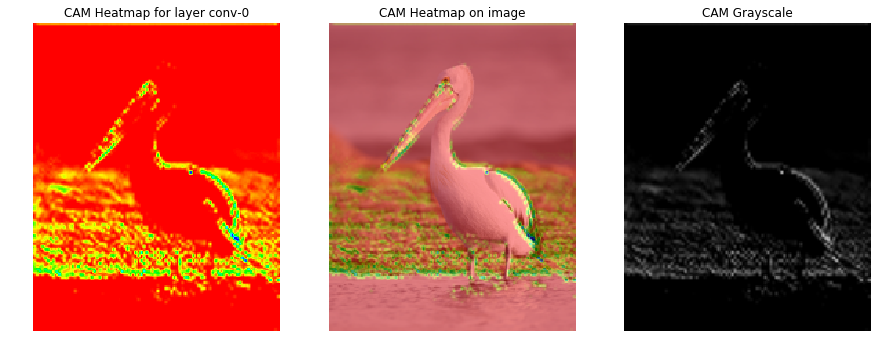

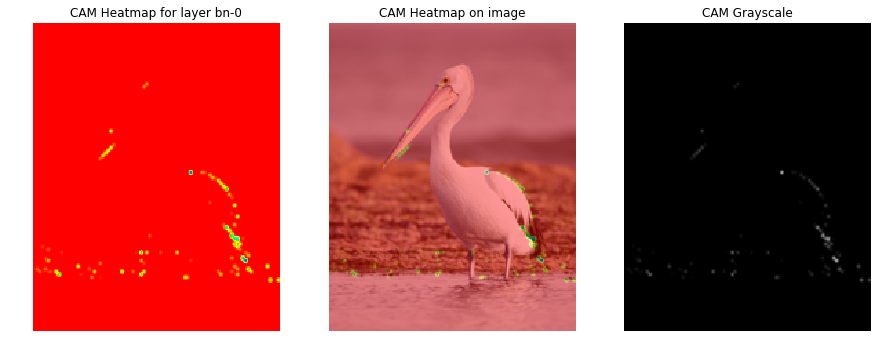

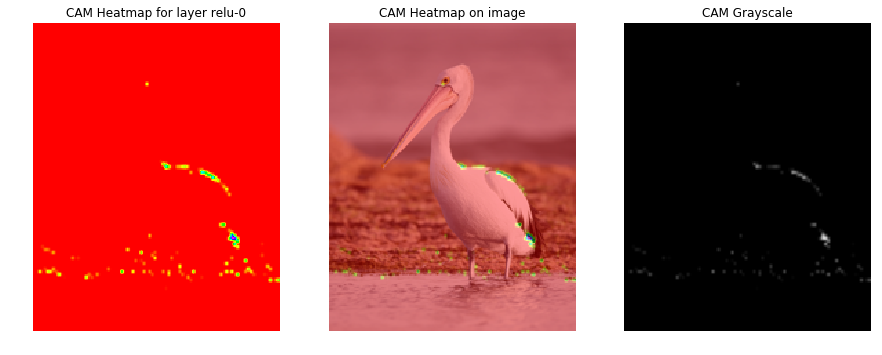

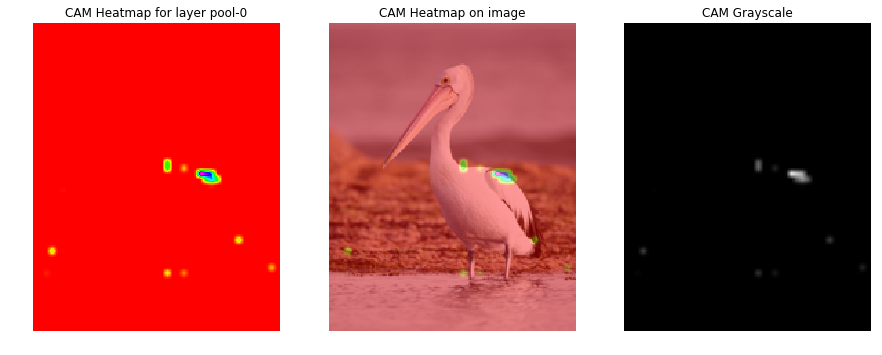

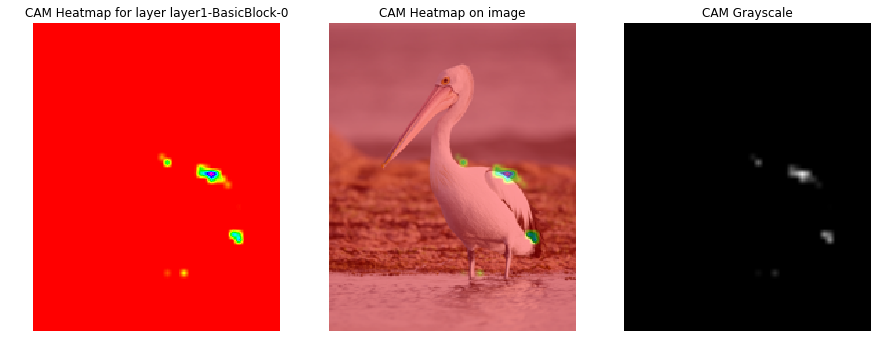

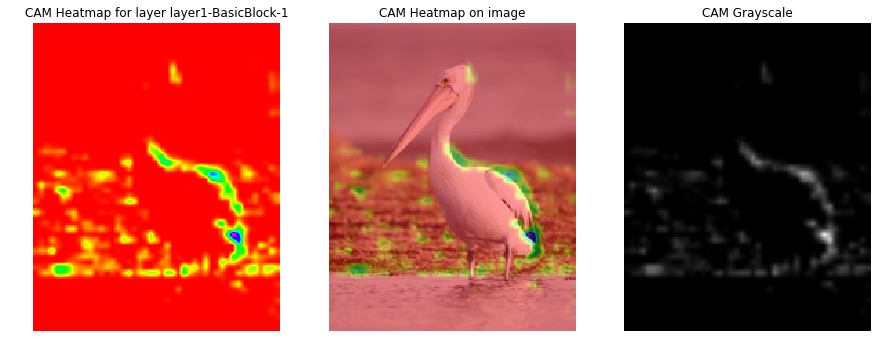

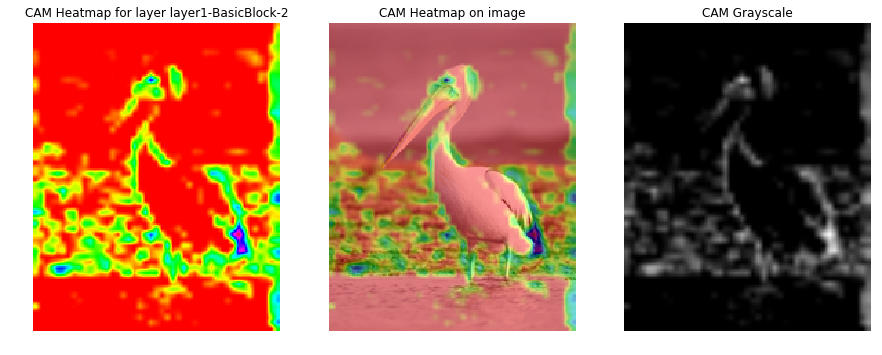

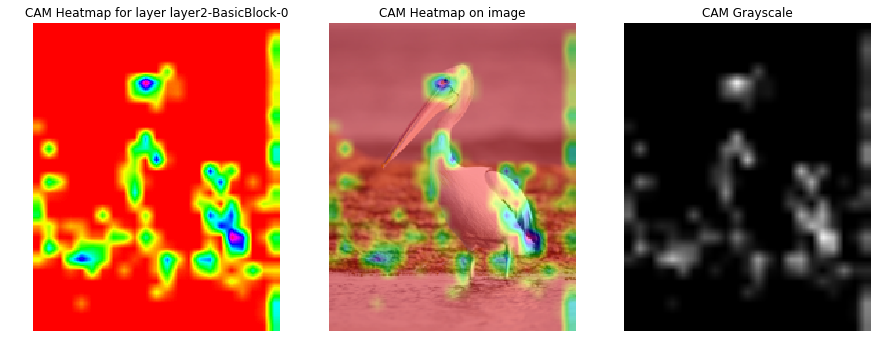

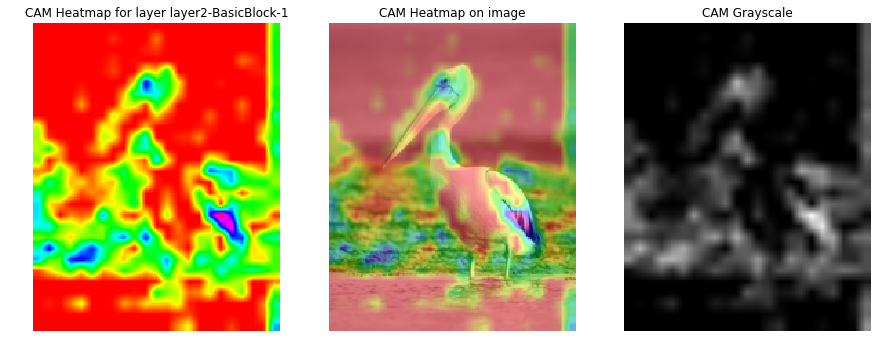

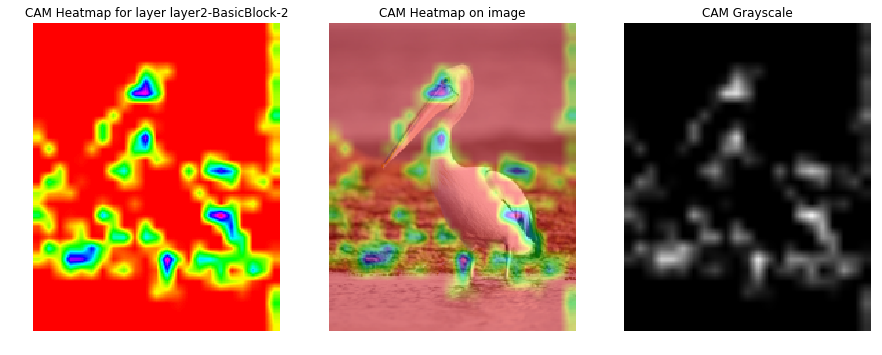

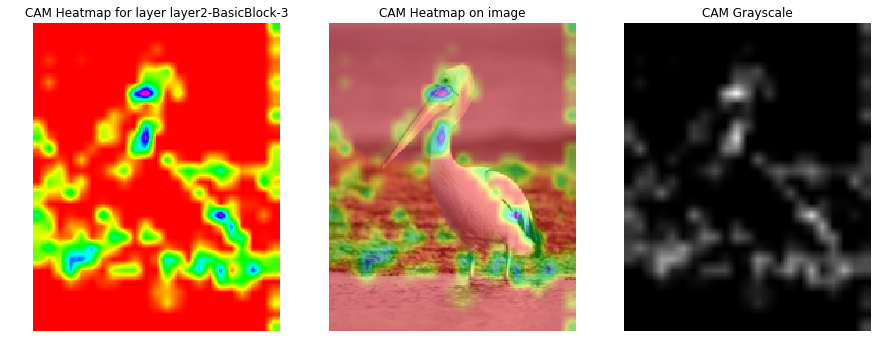

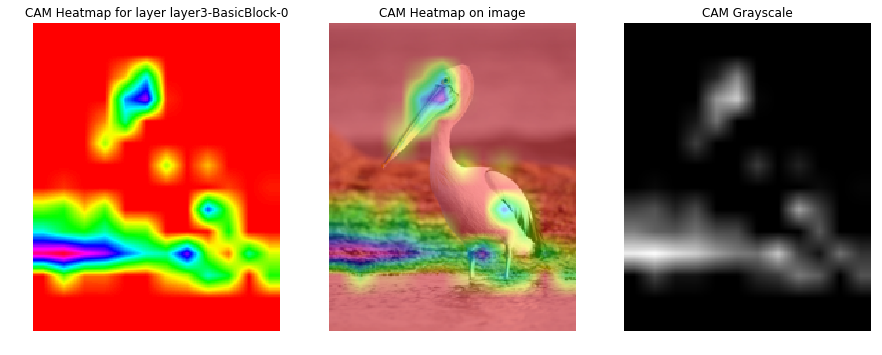

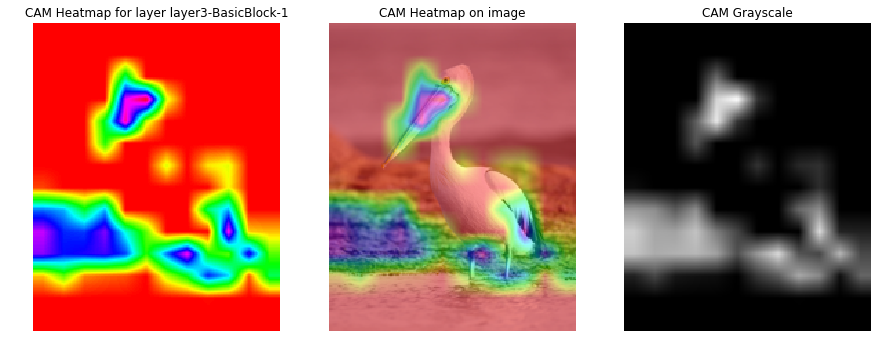

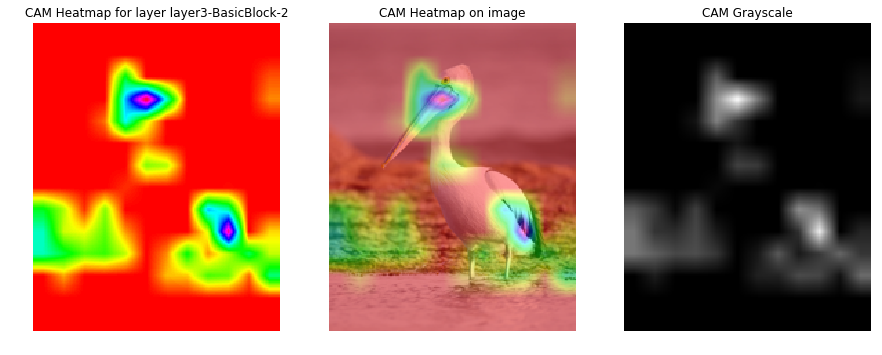

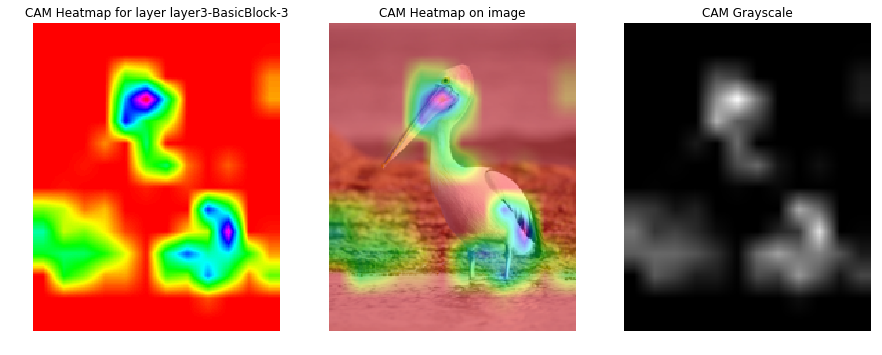

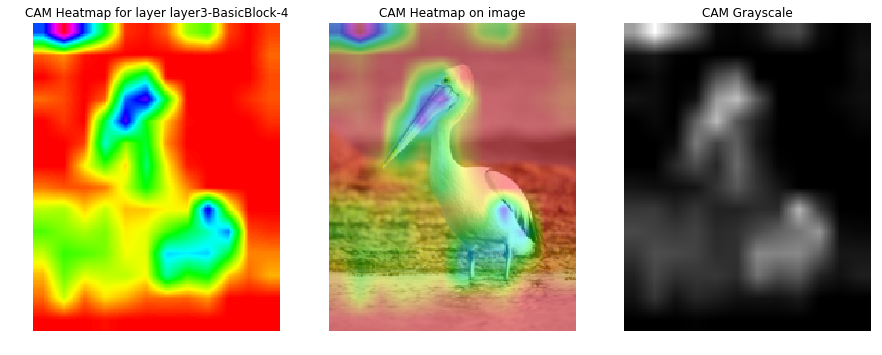

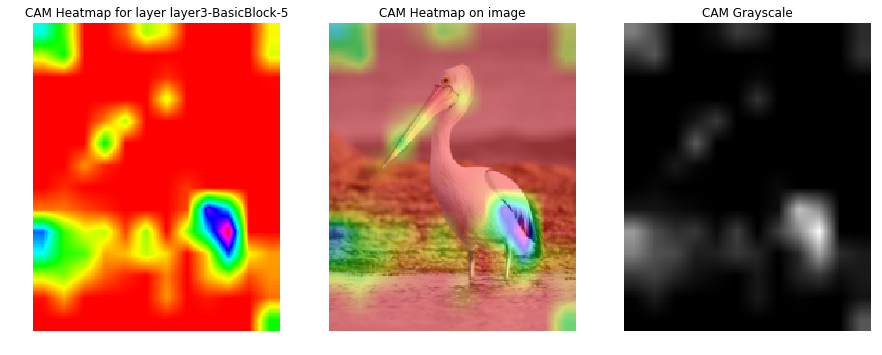

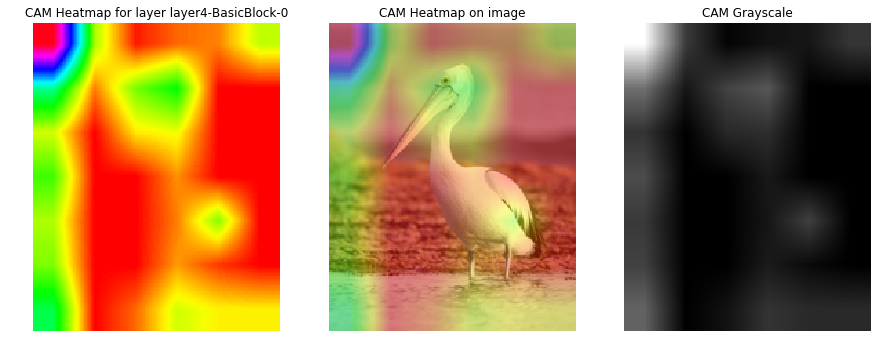

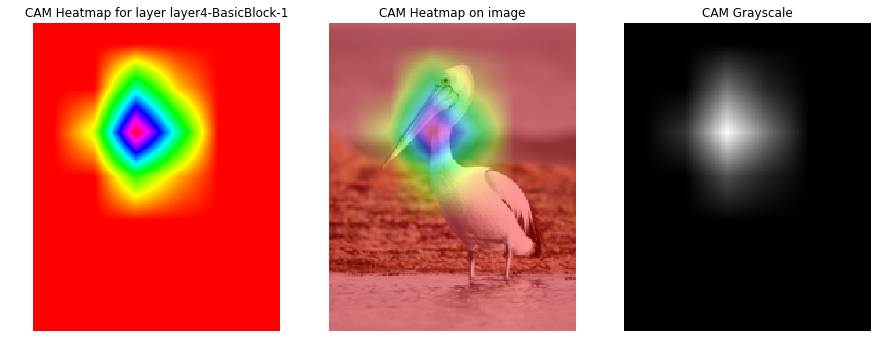

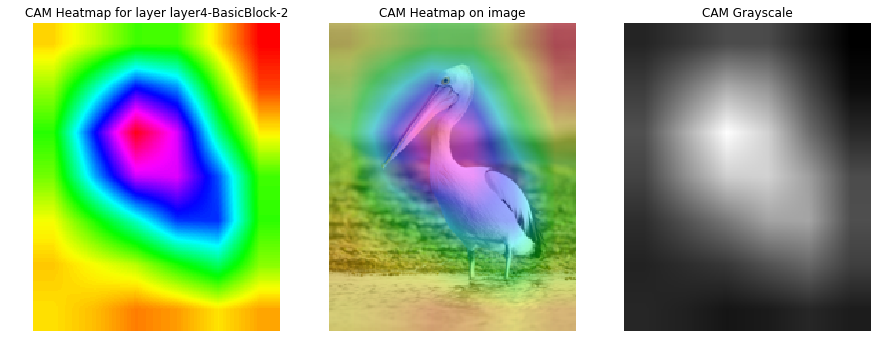

In [38]:
for key in layer_keys[:-3]:
    nl.show_gradcam(key)

In [31]:
target_layer = 'layer2-BasicBlock-2'

In [32]:
cam = nl.generate_cam(target_layer)
cam.shape

torch.Size([224, 179])

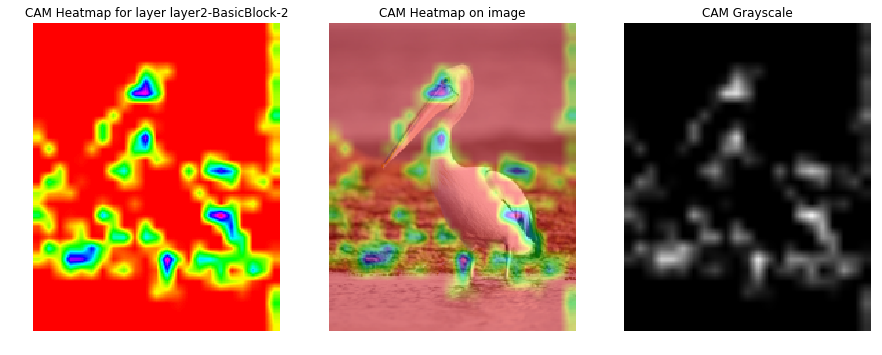

In [33]:
nl.show_gradcam(target_layer)

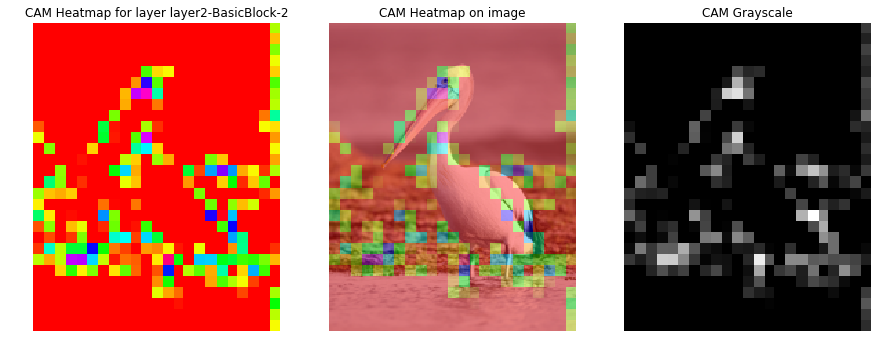

In [34]:
nl.show_gradcam(target_layer, interpolate=False)

In [35]:
def get_gradcam(example_index):
    original_img, name, target_class = get_example_data(example_index, img_path='../old_visual/input_images/')
    pretrained_model = models.alexnet(pretrained=True)
    model = LayeredModule.from_alexnet(pretrained_model, hook_to_activations=True)
    prep_img = preprocess_image(original_img)
    NetLens(model, prep_img, target_class).show_gradcam('features-relu-4')

In [36]:
get_gradcam(0)

AttributeError: type object 'LayeredModule' has no attribute 'from_alexnet'

In [ ]:
get_gradcam(1)

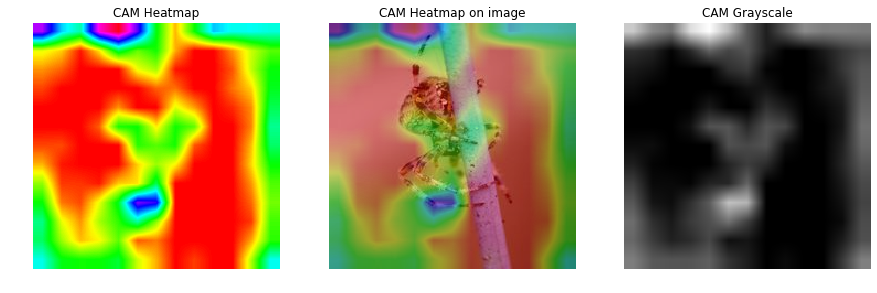

In [13]:
get_gradcam(2)

### Guided GradCAM

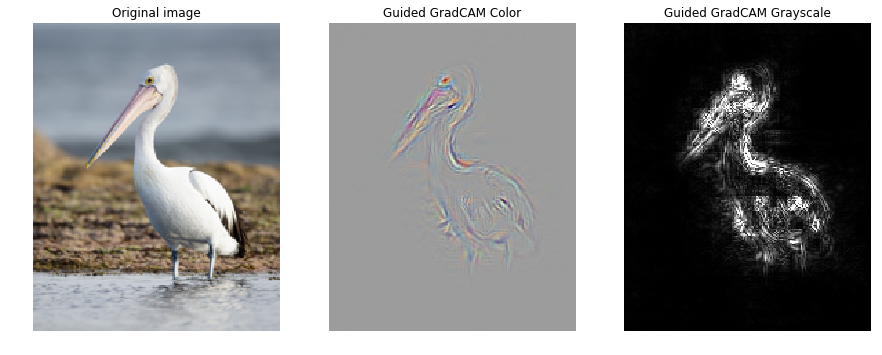

In [14]:
nl.show_guided_gradcam('features-relu-4')

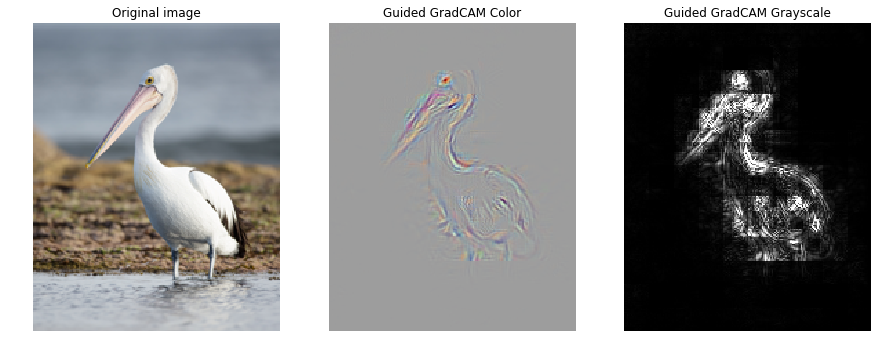

In [15]:
nl.show_guided_gradcam('features-relu-4', interpolate=False)